In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import hvplot.pandas
import holoviews as hv
from bokeh.models import HoverTool

In [2]:
# Read worksheets into dataframes
xls = pd.ExcelFile('Resources/csv_files/Victor Valley Comm Coll Billing and Usage History 72019 thru 62020.xlsx')
energy_summary = pd.read_excel(xls, sheet_name=0)
energy_detail = pd.read_excel(xls, sheet_name=1)

In [3]:
# Checking summary worksheet
energy_summary.head()

,Cust Name,Cust Num,Serv Acct Num,Cust Acct Num,Sic Code,Current Rate,Meter Num,Service Street Addr,City Name,Zip,Bill Amt (Sum),kWh Usage (Sum),Maximum kW (Max)
0,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,873.95,4416,1.0
1,VICTOR VALLEY COMMUNITY COLLEG,377,65395,23884356,8222.0,TOU-GS1E,222011-829695,18422 BEAR VALLEY RD,VICTORVILLE,92395,1746.62,9588,1.0
2,VICTOR VALLEY COMMUNITY COLLEG,377,65396,23884786,8222.0,TOU-GS2B,345M-007091,18422 BEAR VALLEY RD,VICTORVILLE,92395,14984.64,104600,69.0
3,VICTOR VALLEY COMMUNITY COLLEG,377,8642354,12025292,NaN,LS-1-ALLNITE,NaN,B V RD /FISH HATAC HERY RD HERY RD A V,VICTORVILLE,92392,206.68,1020,NaN
4,VICTOR VALLEY COMMUNITY COLLEG,377,10550102,199087016,8222.0,TOU-8-R,V349N-018220,18422 BEAR VALLEY RD,VICTORVILLE,92395,866592.83,6190008,1646.0


In [4]:
# Checking detailed worksheet
energy_detail.head()

,Cust Name,Cust Num,Serv Acct Num,Cust Acct Num,Sic Code,Current Rate,Meter Num,Service Street Addr,City Name,Zip,...,Winter Midpeak Kwh Amt,Winter Midpeak Kw Amt,Winter Offpeak Kwh,Winter Offpk Kw,Winter Offpeak Kwh Amt,Winter Offpeak Kw Amt,Winter Soffpeak Kwh,Winter Soffpk Kw,Winter Soffpeak Kwh Amt,Winter Soffpeak Kw Amt
0,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
3,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,...,0.30,0.0,10.0,0.0,0.65,0.0,0.0,0.0,0.00,0.0
4,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,...,8.66,0.0,312.0,0.0,20.22,0.0,6.0,0.0,0.36,0.0


In [5]:
# Check columns of detailed worksheet
energy_detail.columns

Index(['Cust Name', 'Cust Num', 'Serv Acct Num', 'Cust Acct Num', 'Sic Code',
       'Current Rate', 'Meter Num', 'Service Street Addr', 'City Name', 'Zip',
       'Billing Month Year', 'Meter Read Date', 'Stmt Rate', 'Bill Amt',
       'Kwh Usage', 'City Tax', 'State Tax', 'Maximum kW', 'Billing Days',
       'kW Amt', 'Non Time Related kW Amt', 'Time Related kW Amt',
       'Billing Kvar', 'Summer Billing Days', 'Summer Onpeak Kwh',
       'Summer Onpeak Kw', 'Summer Onpeak Kwh Amt', 'Summer Onpeak Kw Amt',
       'Summer Midpeak Kwh', 'Summer Midpk Kw', 'Summer Midpeak Kwh Amt',
       'Summer Midpeak Kw Amt', 'Summer Offpeak Kwh', 'Summer Offpk Kw',
       'Summer Offpeak Kwh Amt', 'Summer Offpeak Kw Amt',
       'Summer Soffpeak Kwh', 'Summer Soffpk Kw', 'Summer Soffpeak Kwh Amt',
       'Summer Soffpeak Kw Amt', 'Winter Billing Days', 'Winter Onpeak Kwh',
       'Winter Onpeak Kw', 'Winter Onpeak Kwh Amt', 'Winter Onpeak Kw Amt',
       'Winter Midpeak Kwh', 'Winter Midpk Kw', 'W

In [6]:
# Reducing df
reduced_detail = energy_detail[['Billing Month Year', 'Serv Acct Num', 'Stmt Rate', 'Bill Amt', 'Kwh Usage']]
reduced_detail.head()

,Billing Month Year,Serv Acct Num,Stmt Rate,Bill Amt,Kwh Usage
0,Jul 2019,65394,TOU-GS1E,58.32,284
1,Aug 2019,65394,TOU-GS1E,63.30,307
2,Sep 2019,65394,TOU-GS1E,74.47,357
3,Oct 2019,65394,TOU-GS1E,76.64,359
4,Nov 2019,65394,TOU-GS1E,74.83,406


In [7]:
# Reformatted version of Billing Month Year column
test = pd.to_datetime(energy_detail['Billing Month Year'], format = '%b %Y')
test.dt.date.apply(lambda x: x.strftime('%m-%Y'))

0      07-2019
1      08-2019
2      09-2019
3      10-2019
4      11-2019
        ...   
115    02-2020
116    03-2020
117    04-2020
118    05-2020
119    06-2020
Name: Billing Month Year, Length: 120, dtype: object

In [8]:
# Original Billing Month Year column
energy_detail['Billing Month Year'].head()

0    Jul 2019
1    Aug 2019
2    Sep 2019
3    Oct 2019
4    Nov 2019
Name: Billing Month Year, dtype: object

In [9]:
# Checking unique values for account number column
reduced_detail['Serv Acct Num'].unique()

array([   65394,    65395,    65396,  8642354, 10550102, 16548872,
       19509992, 20109789, 38125412, 38333033], dtype=int64)

In [10]:
# Example of a billing df of a single acc
single_account = reduced_detail.loc[reduced_detail['Serv Acct Num'] == 65394]
single_account

,Billing Month Year,Serv Acct Num,Stmt Rate,Bill Amt,Kwh Usage
0,Jul 2019,65394,TOU-GS1E,58.32,284
1,Aug 2019,65394,TOU-GS1E,63.30,307
2,Sep 2019,65394,TOU-GS1E,74.47,357
3,Oct 2019,65394,TOU-GS1E,76.64,359
4,Nov 2019,65394,TOU-GS1E,74.83,406
5,Dec 2019,65394,TOU-GS1E,57.60,278
6,Jan 2020,65394,TOU-GS1E,87.23,456
7,Feb 2020,65394,TOU-GS1E,88.87,453
8,Mar 2020,65394,TOU-GS1E,81.49,418
9,Apr 2020,65394,TOU-GS1E,70.66,377


In [11]:
# Plotting a single accounts bill amount per month using hvplot
single_account.hvplot.bar(x = 'Billing Month Year', y = 'Bill Amt', hover_cols=['Bill Amt', 'Kwh Usage'], title = 'Serv Acct Num: ' + str(single_account['Serv Acct Num'][0]))

:Bars   [Billing Month Year]   (Bill Amt,Kwh Usage)

In [12]:
# Plotting bar charts for each Account for Bill Amount per Month using hvplot
# Saved plots within Resources/Bill Amount by Account
for acct in reduced_detail['Serv Acct Num'].unique():
    acct_df = reduced_detail.loc[reduced_detail['Serv Acct Num'] == acct]
    plot = acct_df.hvplot.bar(x = 'Billing Month Year', y = 'Bill Amt', hover_cols=['Bill Amt', 'Kwh Usage'], title = 'Serv Acct Num: ' + str(acct))
    hvplot.save(plot, f'Resources/Plots/Bill Amount by Account/{acct}BillAmt.html')

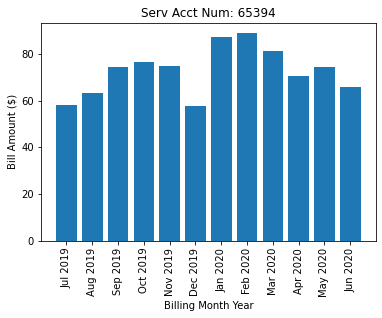

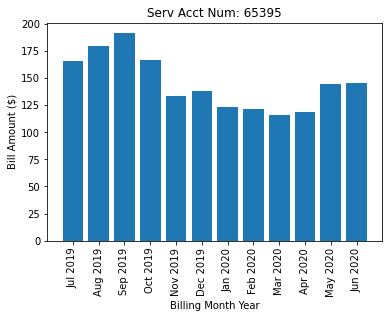

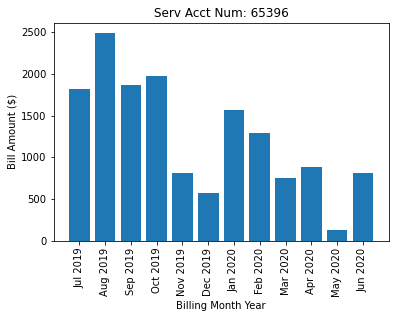

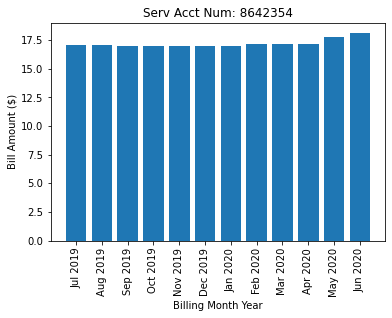

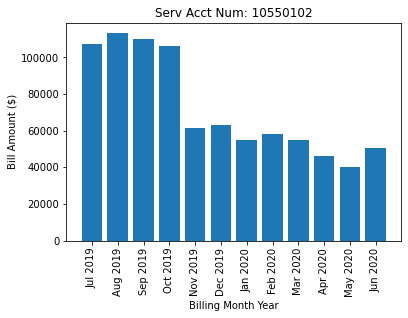

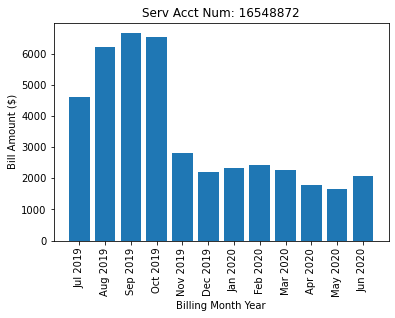

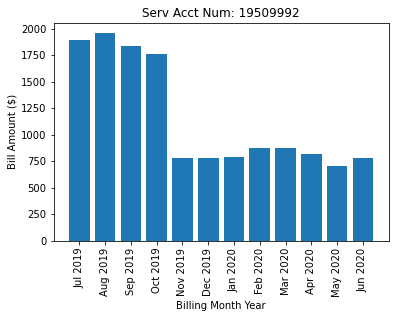

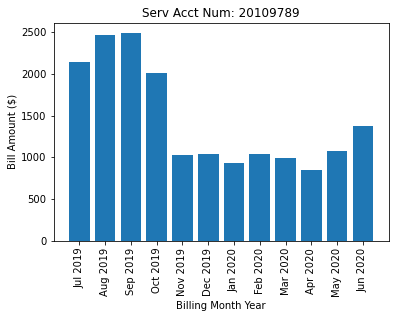

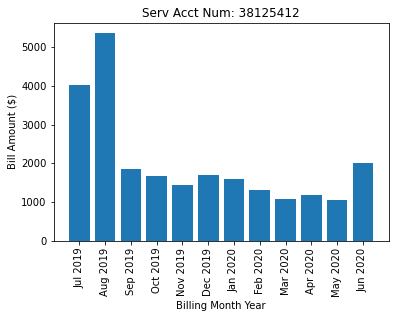

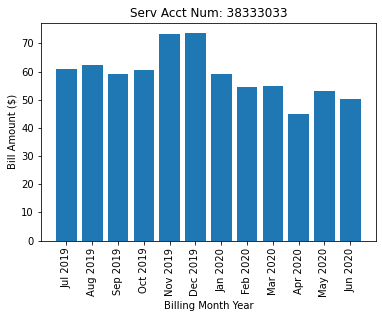

In [13]:
# Plotting bar charts for each Account for Bill Amount per Month using matplotlib
for acct in reduced_detail['Serv Acct Num'].unique():
    acct_df = reduced_detail.loc[reduced_detail['Serv Acct Num'] == acct]
    plt.bar(x = acct_df['Billing Month Year'], height = acct_df['Bill Amt'])
    plt.title('Serv Acct Num: ' + str(acct))
    plt.xticks(rotation = 90)
    plt.xlabel('Billing Month Year')
    plt.ylabel('Bill Amount ($)')
    plt.show()

In [14]:
energy_detail.columns

Index(['Cust Name', 'Cust Num', 'Serv Acct Num', 'Cust Acct Num', 'Sic Code',
       'Current Rate', 'Meter Num', 'Service Street Addr', 'City Name', 'Zip',
       'Billing Month Year', 'Meter Read Date', 'Stmt Rate', 'Bill Amt',
       'Kwh Usage', 'City Tax', 'State Tax', 'Maximum kW', 'Billing Days',
       'kW Amt', 'Non Time Related kW Amt', 'Time Related kW Amt',
       'Billing Kvar', 'Summer Billing Days', 'Summer Onpeak Kwh',
       'Summer Onpeak Kw', 'Summer Onpeak Kwh Amt', 'Summer Onpeak Kw Amt',
       'Summer Midpeak Kwh', 'Summer Midpk Kw', 'Summer Midpeak Kwh Amt',
       'Summer Midpeak Kw Amt', 'Summer Offpeak Kwh', 'Summer Offpk Kw',
       'Summer Offpeak Kwh Amt', 'Summer Offpeak Kw Amt',
       'Summer Soffpeak Kwh', 'Summer Soffpk Kw', 'Summer Soffpeak Kwh Amt',
       'Summer Soffpeak Kw Amt', 'Winter Billing Days', 'Winter Onpeak Kwh',
       'Winter Onpeak Kw', 'Winter Onpeak Kwh Amt', 'Winter Onpeak Kw Amt',
       'Winter Midpeak Kwh', 'Winter Midpk Kw', 'W

In [15]:
# Displaying all of the columns of the dataframe
pd.set_option('display.max_columns', None)

# Grabbing sums for each of the columns grouped by account number
energy_detail_sums = energy_detail.groupby(energy_detail['Serv Acct Num']).sum()
energy_detail_sums

,Cust Num,Cust Acct Num,Sic Code,Zip,Bill Amt,Kwh Usage,City Tax,State Tax,Maximum kW,Billing Days,kW Amt,Non Time Related kW Amt,Time Related kW Amt,Billing Kvar,Summer Billing Days,Summer Onpeak Kwh,Summer Onpeak Kw,Summer Onpeak Kwh Amt,Summer Onpeak Kw Amt,Summer Midpeak Kwh,Summer Midpk Kw,Summer Midpeak Kwh Amt,Summer Midpeak Kw Amt,Summer Offpeak Kwh,Summer Offpk Kw,Summer Offpeak Kwh Amt,Summer Offpeak Kw Amt,Summer Soffpeak Kwh,Summer Soffpk Kw,Summer Soffpeak Kwh Amt,Summer Soffpeak Kw Amt,Winter Billing Days,Winter Onpeak Kwh,Winter Onpeak Kw,Winter Onpeak Kwh Amt,Winter Onpeak Kw Amt,Winter Midpeak Kwh,Winter Midpk Kw,Winter Midpeak Kwh Amt,Winter Midpeak Kw Amt,Winter Offpeak Kwh,Winter Offpk Kw,Winter Offpeak Kwh Amt,Winter Offpeak Kw Amt,Winter Soffpeak Kwh,Winter Soffpk Kw,Winter Soffpeak Kwh Amt,Winter Soffpeak Kw Amt
Serv Acct Num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65394,4524,286607244,98664.0,1108740,873.95,4416,0.0,1.34,12.0,365,0.00,0.00,0.00,0.0,121.0,125.0,0.0,10.80,0.00,53.0,0.0,4.57,0.00,1138.0,0.0,61.13,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,720.0,0.0,58.30,0.00,2338.0,0.0,130.85,0.0,42.0,0.0,2.46,0.0
65395,4524,286612272,98664.0,1108740,1746.62,9588,0.0,2.88,12.0,365,0.00,0.00,0.00,0.0,121.0,505.0,0.0,41.32,0.00,213.0,0.0,17.18,0.00,2742.0,0.0,145.93,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,1312.0,0.0,114.73,0.00,2896.0,0.0,164.54,0.0,1920.0,0.0,100.87,0.0
65396,4524,286617432,98664.0,1108740,14984.64,104600,0.0,7.41,510.0,365,12412.77,8476.45,3936.32,0.0,121.0,2555.0,221.0,0.00,2971.14,12709.0,234.0,0.00,965.18,22952.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,15859.0,0.0,-16.32,0.00,50525.0,0.0,115.06,0.0,0.0,0.0,0.00,0.0
8642354,4524,144303504,0.0,1108704,206.68,1020,0.0,0.00,0.0,366,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
10550102,4524,2389044192,98664.0,1108740,866592.83,6190008,0.0,1855.56,16501.0,365,190731.97,190731.97,0.00,7574.0,121.0,503481.0,0.0,39316.28,0.00,767578.0,0.0,25017.53,0.00,1234215.0,0.0,20633.26,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,1615256.0,0.0,35022.85,0.00,2069478.0,0.0,29268.09,0.0,0.0,0.0,0.00,0.0
16548872,4524,2484114960,98664.0,1108740,41552.29,206969,0.0,62.08,839.0,365,20643.25,8881.44,11761.81,0.0,121.0,19662.0,409.0,328.39,10647.99,6914.0,268.0,114.76,0.00,68598.0,0.0,1147.86,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,22163.0,409.0,417.58,1113.82,51001.0,0.0,915.92,0.0,38631.0,0.0,727.24,0.0
19509992,4524,2790291960,98664.0,1108740,13854.73,93557,0.0,4.27,539.0,365,12457.53,8988.06,3469.47,0.0,121.0,1802.0,182.0,0.00,2535.65,11683.0,217.0,0.00,933.82,23529.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,13595.0,0.0,0.00,0.00,42948.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
20109789,4524,286629804,98664.0,1108740,17443.21,101577,0.0,30.47,289.0,365,6757.74,3081.33,3676.41,0.0,121.0,7552.0,135.0,126.03,3259.69,2634.0,86.0,42.76,0.00,34242.0,0.0,563.93,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,11737.0,143.0,225.02,416.72,23997.0,0.0,447.90,0.0,21415.0,0.0,414.27,0.0
38125412,4524,4167941148,98664.0,1107684,24245.60,286064,0.0,0.00,1503.0,365,15866.32,15866.32,0.00,0.0,121.0,23297.0,0.0,434.25,0.00,41383.0,0.0,1168.91,0.00,60586.0,0.0,886.12,0.0,0.0,0.0,0.0,0.0,244.0,0.0,0.0,0.0,0.0,51143.0,0.0,-215.33,0.00,109655.0,0.0,795.60,0.0,0.0,0.0,0.00,0.0


In [16]:
# Listing each column that contains only zeros
[col for col in energy_detail_sums.columns if energy_detail[col].sum() == 0]

['City Tax',
 'Summer Offpk Kw',
 'Summer Offpeak Kw Amt',
 'Summer Soffpeak Kwh',
 'Summer Soffpk Kw',
 'Summer Soffpeak Kwh Amt',
 'Summer Soffpeak Kw Amt',
 'Winter Onpeak Kwh',
 'Winter Onpeak Kw',
 'Winter Onpeak Kwh Amt',
 'Winter Onpeak Kw Amt',
 'Winter Offpk Kw',
 'Winter Offpeak Kw Amt',
 'Winter Soffpk Kw',
 'Winter Soffpeak Kw Amt']

In [17]:
# Creating a df without any of the columns that contain only zeros
non_zero_detail = energy_detail
non_zero_detail.drop(columns = [col for col in energy_detail_sums.columns if energy_detail[col].sum() == 0], inplace = True)
non_zero_detail

,Cust Name,Cust Num,Serv Acct Num,Cust Acct Num,Sic Code,Current Rate,Meter Num,Service Street Addr,City Name,Zip,Billing Month Year,Meter Read Date,Stmt Rate,Bill Amt,Kwh Usage,State Tax,Maximum kW,Billing Days,kW Amt,Non Time Related kW Amt,Time Related kW Amt,Billing Kvar,Summer Billing Days,Summer Onpeak Kwh,Summer Onpeak Kw,Summer Onpeak Kwh Amt,Summer Onpeak Kw Amt,Summer Midpeak Kwh,Summer Midpk Kw,Summer Midpeak Kwh Amt,Summer Midpeak Kw Amt,Summer Offpeak Kwh,Summer Offpeak Kwh Amt,Winter Billing Days,Winter Midpeak Kwh,Winter Midpk Kw,Winter Midpeak Kwh Amt,Winter Midpeak Kw Amt,Winter Offpeak Kwh,Winter Offpeak Kwh Amt,Winter Soffpeak Kwh,Winter Soffpeak Kwh Amt
0,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Jul 2019,2019-07-03,TOU-GS1E,58.32,284,0.09,1.0,29,0.0,0.0,0.0,0.0,29.0,22.0,0.0,2.29,0.0,8.0,0.0,0.83,0.0,254.0,17.22,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
1,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Aug 2019,2019-08-02,TOU-GS1E,63.30,307,0.09,1.0,30,0.0,0.0,0.0,0.0,30.0,23.0,0.0,0.59,0.0,9.0,0.0,0.20,0.0,275.0,4.21,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
2,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Sep 2019,2019-09-03,TOU-GS1E,74.47,357,0.11,1.0,32,0.0,0.0,0.0,0.0,32.0,32.0,0.0,3.15,0.0,18.0,0.0,1.77,0.0,307.0,19.90,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
3,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Oct 2019,2019-10-02,TOU-GS1E,76.64,359,0.11,1.0,29,0.0,0.0,0.0,0.0,28.0,45.0,0.0,4.43,0.0,18.0,0.0,1.77,0.0,283.0,18.34,1.0,3.0,0.0,0.30,0.0,10.0,0.65,0.0,0.00
4,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Nov 2019,2019-11-01,TOU-GS1E,74.83,406,0.12,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,30.0,88.0,0.0,8.66,0.0,312.0,20.22,6.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,VICTOR VALLEY COMMUNITY COLLEG,377,38333033,342444775,8222.0,TOU-GS1E,356150-000144,19190 NAVAJO RD HSE,APPLE VALLEY,92307,Feb 2020,2020-02-04,TOU-GS1E,54.40,484,0.00,1.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,29.0,138.0,0.0,14.19,0.0,343.0,22.83,3.0,0.18
116,VICTOR VALLEY COMMUNITY COLLEG,377,38333033,342444775,8222.0,TOU-GS1E,356150-000144,19190 NAVAJO RD HSE,APPLE VALLEY,92307,Mar 2020,2020-03-06,TOU-GS1E,54.74,483,0.00,1.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,31.0,129.0,0.0,13.26,0.0,351.0,23.36,3.0,0.18
117,VICTOR VALLEY COMMUNITY COLLEG,377,38333033,342444775,8222.0,TOU-GS1E,356150-000144,19190 NAVAJO RD HSE,APPLE VALLEY,92307,Apr 2020,2020-04-03,TOU-GS1E,45.01,401,0.00,1.0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,28.0,72.0,0.0,7.40,0.0,326.0,21.70,3.0,0.18
118,VICTOR VALLEY COMMUNITY COLLEG,377,38333033,342444775,8222.0,TOU-GS1E,356150-000144,19190 NAVAJO RD HSE,APPLE VALLEY,92307,May 2020,2020-05-05,TOU-GS1E,53.21,426,0.00,1.0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,32.0,73.0,0.0,5.56,0.0,350.0,17.60,3.0,0.13


In [18]:
# View one account without columns containing only zeros
non_zero_detail.loc[non_zero_detail['Serv Acct Num'] == 65394]

,Cust Name,Cust Num,Serv Acct Num,Cust Acct Num,Sic Code,Current Rate,Meter Num,Service Street Addr,City Name,Zip,Billing Month Year,Meter Read Date,Stmt Rate,Bill Amt,Kwh Usage,State Tax,Maximum kW,Billing Days,kW Amt,Non Time Related kW Amt,Time Related kW Amt,Billing Kvar,Summer Billing Days,Summer Onpeak Kwh,Summer Onpeak Kw,Summer Onpeak Kwh Amt,Summer Onpeak Kw Amt,Summer Midpeak Kwh,Summer Midpk Kw,Summer Midpeak Kwh Amt,Summer Midpeak Kw Amt,Summer Offpeak Kwh,Summer Offpeak Kwh Amt,Winter Billing Days,Winter Midpeak Kwh,Winter Midpk Kw,Winter Midpeak Kwh Amt,Winter Midpeak Kw Amt,Winter Offpeak Kwh,Winter Offpeak Kwh Amt,Winter Soffpeak Kwh,Winter Soffpeak Kwh Amt
0,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Jul 2019,2019-07-03,TOU-GS1E,58.32,284,0.09,1.0,29,0.0,0.0,0.0,0.0,29.0,22.0,0.0,2.29,0.0,8.0,0.0,0.83,0.0,254.0,17.22,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
1,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Aug 2019,2019-08-02,TOU-GS1E,63.30,307,0.09,1.0,30,0.0,0.0,0.0,0.0,30.0,23.0,0.0,0.59,0.0,9.0,0.0,0.20,0.0,275.0,4.21,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
2,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Sep 2019,2019-09-03,TOU-GS1E,74.47,357,0.11,1.0,32,0.0,0.0,0.0,0.0,32.0,32.0,0.0,3.15,0.0,18.0,0.0,1.77,0.0,307.0,19.90,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
3,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Oct 2019,2019-10-02,TOU-GS1E,76.64,359,0.11,1.0,29,0.0,0.0,0.0,0.0,28.0,45.0,0.0,4.43,0.0,18.0,0.0,1.77,0.0,283.0,18.34,1.0,3.0,0.0,0.30,0.0,10.0,0.65,0.0,0.00
4,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Nov 2019,2019-11-01,TOU-GS1E,74.83,406,0.12,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,30.0,88.0,0.0,8.66,0.0,312.0,20.22,6.0,0.36
5,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Dec 2019,2019-12-04,TOU-GS1E,57.60,278,0.08,1.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,33.0,82.0,0.0,8.07,0.0,191.0,12.38,5.0,0.30
6,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Jan 2020,2020-01-03,TOU-GS1E,87.23,456,0.14,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,30.0,137.0,0.0,0.93,0.0,312.0,1.40,7.0,0.42
7,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Feb 2020,2020-02-03,TOU-GS1E,88.87,453,0.14,1.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,31.0,127.0,0.0,13.06,0.0,321.0,21.37,5.0,0.31
8,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Mar 2020,2020-03-04,TOU-GS1E,81.49,418,0.13,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,30.0,109.0,0.0,11.21,0.0,303.0,20.17,6.0,0.37
9,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Apr 2020,2020-04-02,TOU-GS1E,70.66,377,0.11,1.0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,29.0,72.0,0.0,7.40,0.0,299.0,19.90,6.0,0.37


In [19]:
# Make function to take in a df and plot billing per month per account within df usuing holoviews
def plot_acc_monthly_bills(df):
    acc_bill_curves = []
    for acct in df['Serv Acct Num'].unique():
        acc_bill_curves.append(hv.Curve(
            df.loc[energy_detail['Serv Acct Num'] == acct][['Billing Month Year', 'Bill Amt']], 
            label = f'Acct Num: {acct}'))

    return hv.Overlay(acc_bill_curves).opts(
        yformatter = '%.0f',
        height = 500,
        width = 1000,
        xlabel = 'Billing Month Year',
        ylabel = 'Billing Amount',
        title = 'Billing per Month per Account',
        legend_position = 'right')

In [20]:
# Saving line chart of billing of all accounts by month
hv.save(plot_acc_monthly_bills(energy_detail), 'Resources/Plots/All_Accounts_Billing_by_Month.html')

In [21]:
# Plot monthly billing of all accounts
plot_acc_monthly_bills(energy_detail)

:Overlay
   .Curve.Acct_Num_colon_65394    :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_65395    :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_65396    :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_8642354  :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_10550102 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_16548872 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_19509992 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_20109789 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_38125412 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_38333033 :Curve   [Billing Month Year]   (Bill Amt)

In [22]:
# Create df without acc number 10550102 and plot monthly billing amount
without_largest_acct = energy_detail[energy_detail['Serv Acct Num'] != 10550102]
plot_acc_monthly_bills(without_largest_acct)

:Overlay
   .Curve.Acct_Num_colon_65394    :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_65395    :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_65396    :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_8642354  :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_16548872 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_19509992 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_20109789 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_38125412 :Curve   [Billing Month Year]   (Bill Amt)
   .Curve.Acct_Num_colon_38333033 :Curve   [Billing Month Year]   (Bill Amt)

In [23]:
# Saving line chart of billing of all accounts except 10550102 by month
hv.save(plot_acc_monthly_bills(without_largest_acct), 'Resources/Plots/All_But_10550102_Accounts_Billing_by_Month.html')

In [24]:
# Create function to plot energy usuage per month per account
def plot_acc_monthly_usage(df):
    acc_bill_curves = []
    for acct in df['Serv Acct Num'].unique():
        acc_bill_curves.append(hv.Curve(
            df.loc[energy_detail['Serv Acct Num'] == acct][['Billing Month Year', 'Kwh Usage']], 
            label = f'Acct Num: {acct}'))

    return hv.Overlay(acc_bill_curves).opts(
        yformatter = '%.0f',
        height = 500,
        width = 1000,
        xlabel = 'Billing Month Year',
        ylabel = 'Kwh Usage',
        title = 'Kwh Usage per Month per Account',
        legend_position = 'right')

In [25]:
# Plot energy usage of all accounts except
plot_acc_monthly_usage(energy_detail)

:Overlay
   .Curve.Acct_Num_colon_65394    :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_65395    :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_65396    :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_8642354  :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_10550102 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_16548872 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_19509992 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_20109789 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_38125412 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_38333033 :Curve   [Billing Month Year]   (Kwh Usage)

In [26]:
# Saving Energy usage per month for each account
hv.save(plot_acc_monthly_usage(energy_detail), 'Resources/Plots/All_Accounts_Usage_by_Month.html')

In [27]:
# Plot energy usage of all accounts except account number 10550102
plot_acc_monthly_usage(without_largest_acct)

:Overlay
   .Curve.Acct_Num_colon_65394    :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_65395    :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_65396    :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_8642354  :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_16548872 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_19509992 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_20109789 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_38125412 :Curve   [Billing Month Year]   (Kwh Usage)
   .Curve.Acct_Num_colon_38333033 :Curve   [Billing Month Year]   (Kwh Usage)

In [28]:
# Saving Energy usage per month for each account
hv.save(plot_acc_monthly_usage(without_largest_acct), 'Resources/Plots/All_But_10550102_Accounts_Usage_by_Month.html')

In [29]:
# Reading non zero columns for reference
non_zero_detail.columns

Index(['Cust Name', 'Cust Num', 'Serv Acct Num', 'Cust Acct Num', 'Sic Code',
       'Current Rate', 'Meter Num', 'Service Street Addr', 'City Name', 'Zip',
       'Billing Month Year', 'Meter Read Date', 'Stmt Rate', 'Bill Amt',
       'Kwh Usage', 'State Tax', 'Maximum kW', 'Billing Days', 'kW Amt',
       'Non Time Related kW Amt', 'Time Related kW Amt', 'Billing Kvar',
       'Summer Billing Days', 'Summer Onpeak Kwh', 'Summer Onpeak Kw',
       'Summer Onpeak Kwh Amt', 'Summer Onpeak Kw Amt', 'Summer Midpeak Kwh',
       'Summer Midpk Kw', 'Summer Midpeak Kwh Amt', 'Summer Midpeak Kw Amt',
       'Summer Offpeak Kwh', 'Summer Offpeak Kwh Amt', 'Winter Billing Days',
       'Winter Midpeak Kwh', 'Winter Midpk Kw', 'Winter Midpeak Kwh Amt',
       'Winter Midpeak Kw Amt', 'Winter Offpeak Kwh', 'Winter Offpeak Kwh Amt',
       'Winter Soffpeak Kwh', 'Winter Soffpeak Kwh Amt'],
      dtype='object')

In [30]:
non_zero_detail.head()

,Cust Name,Cust Num,Serv Acct Num,Cust Acct Num,Sic Code,Current Rate,Meter Num,Service Street Addr,City Name,Zip,Billing Month Year,Meter Read Date,Stmt Rate,Bill Amt,Kwh Usage,State Tax,Maximum kW,Billing Days,kW Amt,Non Time Related kW Amt,Time Related kW Amt,Billing Kvar,Summer Billing Days,Summer Onpeak Kwh,Summer Onpeak Kw,Summer Onpeak Kwh Amt,Summer Onpeak Kw Amt,Summer Midpeak Kwh,Summer Midpk Kw,Summer Midpeak Kwh Amt,Summer Midpeak Kw Amt,Summer Offpeak Kwh,Summer Offpeak Kwh Amt,Winter Billing Days,Winter Midpeak Kwh,Winter Midpk Kw,Winter Midpeak Kwh Amt,Winter Midpeak Kw Amt,Winter Offpeak Kwh,Winter Offpeak Kwh Amt,Winter Soffpeak Kwh,Winter Soffpeak Kwh Amt
0,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Jul 2019,2019-07-03,TOU-GS1E,58.32,284,0.09,1.0,29,0.0,0.0,0.0,0.0,29.0,22.0,0.0,2.29,0.0,8.0,0.0,0.83,0.0,254.0,17.22,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
1,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Aug 2019,2019-08-02,TOU-GS1E,63.30,307,0.09,1.0,30,0.0,0.0,0.0,0.0,30.0,23.0,0.0,0.59,0.0,9.0,0.0,0.20,0.0,275.0,4.21,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
2,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Sep 2019,2019-09-03,TOU-GS1E,74.47,357,0.11,1.0,32,0.0,0.0,0.0,0.0,32.0,32.0,0.0,3.15,0.0,18.0,0.0,1.77,0.0,307.0,19.90,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00
3,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Oct 2019,2019-10-02,TOU-GS1E,76.64,359,0.11,1.0,29,0.0,0.0,0.0,0.0,28.0,45.0,0.0,4.43,0.0,18.0,0.0,1.77,0.0,283.0,18.34,1.0,3.0,0.0,0.30,0.0,10.0,0.65,0.0,0.00
4,VICTOR VALLEY COMMUNITY COLLEG,377,65394,23883937,8222.0,TOU-GS1E,222011-830806,18422 BEAR VALLEY RD,VICTORVILLE,92395,Nov 2019,2019-11-01,TOU-GS1E,74.83,406,0.12,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,30.0,88.0,0.0,8.66,0.0,312.0,20.22,6.0,0.36


In [31]:
# Create df of cost per kw per month
usage_df = non_zero_detail[['Serv Acct Num', 'Billing Month Year', 'Bill Amt', 'Kwh Usage']]
usage_df.head()

,Serv Acct Num,Billing Month Year,Bill Amt,Kwh Usage
0,65394,Jul 2019,58.32,284
1,65394,Aug 2019,63.30,307
2,65394,Sep 2019,74.47,357
3,65394,Oct 2019,76.64,359
4,65394,Nov 2019,74.83,406


In [32]:
# Create cost per kwh column
usage_df['Cost per Kwh'] = usage_df['Bill Amt'] / usage_df['Kwh Usage']
usage_df.head()

C:\Users\geeky\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Serv Acct Num,Billing Month Year,Bill Amt,Kwh Usage,Cost per Kwh
0,65394,Jul 2019,58.32,284,0.205352
1,65394,Aug 2019,63.30,307,0.206189
2,65394,Sep 2019,74.47,357,0.208599
3,65394,Oct 2019,76.64,359,0.213482
4,65394,Nov 2019,74.83,406,0.184310


In [33]:
# Check created data for null valules
usage_df['Cost per Kwh'].isnull().sum()

0

In [34]:
# Saving usage_df as csv
usage_df.to_csv('Resources/csv_files/usage_df.csv', index = False)

In [35]:
# Creating monthly bill usage dataframe
monthly_bill_usage = usage_df.drop(columns = 'Serv Acct Num')\
    .groupby('Billing Month Year')[['Billing Month Year', 'Bill Amt', 'Kwh Usage']]\
    .sum()

In [36]:
# Reset index so Billing Month Year is a column
monthly_bill_usage.reset_index(inplace = True)

In [37]:
# Reformat Billing Month Year column to datetime format
monthly_bill_usage['Billing Month Year'] = pd.to_datetime(monthly_bill_usage['Billing Month Year'], format = '%b %Y')
monthly_bill_usage['Billing Month Year'] = monthly_bill_usage['Billing Month Year'].dt.date.apply(lambda x: x.strftime('%Y-%m'))

In [38]:
# Create Cost per Kwh column
monthly_bill_usage['Cost per Kwh'] = monthly_bill_usage['Bill Amt'] / monthly_bill_usage['Kwh Usage']
monthly_bill_usage.sort_values(by = 'Billing Month Year', inplace = True)

In [39]:
# Rename Billing Month Year to Billing Year Month to better match data
monthly_bill_usage.rename(columns = {'Billing Month Year': 'Billing Year Month'}, inplace = True)

In [40]:
# View Monthly Bill Usage dataframe
monthly_bill_usage

,Billing Year Month,Bill Amt,Kwh Usage,Cost per Kwh
5,2019-07,122081.09,677691,0.180143
1,2019-08,131900.34,738472,0.178613
11,2019-09,125209.02,751326,0.166651
10,2019-10,120286.17,665698,0.180692
9,2019-11,68849.94,608574,0.113133
2,2019-12,69915.75,657057,0.106407
4,2020-01,62672.54,568084,0.110323
3,2020-02,65467.43,611579,0.107047
7,2020-03,61114.12,548041,0.111514
0,2020-04,52075.42,427481,0.121819


In [41]:
# Saving the monthly bill usage df to a csv
monthly_bill_usage.to_csv('Resources/csv_files/monthly_bill_usage.csv', index = False)

<Figure size 576x432 with 0 Axes>

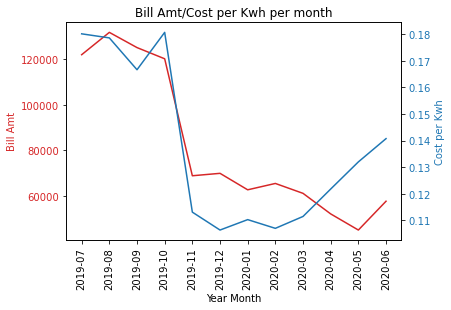

<Figure size 576x432 with 0 Axes>

In [57]:
# Graphing total bill amount and cost per kwh over months
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year Month')
plt.xticks(rotation = 90)
ax1.set_ylabel('Bill Amt', color=color)
ax1.plot(monthly_bill_usage['Billing Year Month'], monthly_bill_usage['Bill Amt'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Cost per Kwh', color=color)
ax2.plot(monthly_bill_usage['Billing Year Month'], monthly_bill_usage['Cost per Kwh'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Bill Amt/Cost per Kwh per month')
plt.savefig('Resources/Plots/Bill_Amt_Cost_per_Kwh_per_month.png', format = 'png', bbox_inches='tight')
plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

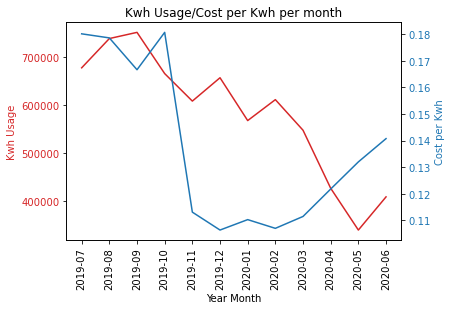

<Figure size 576x432 with 0 Axes>

In [58]:
# Graphing total usage and cost per kwh over months
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year Month')
plt.xticks(rotation = 90)
ax1.set_ylabel('Kwh Usage', color=color)
ax1.plot(monthly_bill_usage['Billing Year Month'], monthly_bill_usage['Kwh Usage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Cost per Kwh', color=color)
ax2.plot(monthly_bill_usage['Billing Year Month'], monthly_bill_usage['Cost per Kwh'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Kwh Usage/Cost per Kwh per month')
plt.savefig('Resources/Plots/Kwh_Usage_Cost_per_Kwh_per_month.png', format = 'png', bbox_inches='tight')
plt.figure(figsize = (8,6))

In [44]:
# Checking usage_df for reference to create high_low_bills dataframe below
usage_df.head()

,Serv Acct Num,Billing Month Year,Bill Amt,Kwh Usage,Cost per Kwh
0,65394,Jul 2019,58.32,284,0.205352
1,65394,Aug 2019,63.30,307,0.206189
2,65394,Sep 2019,74.47,357,0.208599
3,65394,Oct 2019,76.64,359,0.213482
4,65394,Nov 2019,74.83,406,0.184310


In [45]:
# Creating dataframe for highest and lowest bills and the corresponding months for each account number
data = []
for acct in usage_df['Serv Acct Num'].unique():
    temp_df = usage_df.loc[usage_df['Serv Acct Num'] == acct]
    lowest_bill_date = temp_df.loc[temp_df['Bill Amt'] == temp_df['Bill Amt'].min()]['Billing Month Year'].iloc[:1].item()
    highest_bill_date = temp_df.loc[temp_df['Bill Amt'] == temp_df['Bill Amt'].max()]['Billing Month Year'].item()
    data.append(
    {'Serv Acct Num': acct, 
     'Highest Bill Date': highest_bill_date,
    'Highest Bill': temp_df['Bill Amt'].max(),
    'Lowest Bill Date': lowest_bill_date,
    'Lowest Bill': temp_df['Bill Amt'].min()})
high_low_bills = pd.DataFrame(data)
high_low_bills

,Serv Acct Num,Highest Bill Date,Highest Bill,Lowest Bill Date,Lowest Bill
0,65394,Feb 2020,88.87,Dec 2019,57.60
1,65395,Sep 2019,191.54,Mar 2020,116.06
2,65396,Aug 2019,2486.47,May 2020,127.72
3,8642354,Jun 2020,18.09,Sep 2019,17.01
4,10550102,Aug 2019,113099.61,May 2020,40084.51
5,16548872,Sep 2019,6653.36,May 2020,1646.55
6,19509992,Aug 2019,1957.21,May 2020,700.04
7,20109789,Sep 2019,2486.59,Apr 2020,843.58
8,38125412,Aug 2019,5359.23,May 2020,1056.35
9,38333033,Dec 2019,73.51,Apr 2020,45.01


In [46]:
# Saving the high_low_bills dataframe to a csv file
high_low_bills.to_csv('Resources/csv_files/high_low_bills.csv', index = False)